<a href="https://colab.research.google.com/github/RohitAwate/TheOfficeScriptGenerator/blob/main/Final_NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get dataset from Kaggle

In [1]:
# Loading the dataset from Kaggle
!mkdir -p ~/.kaggle
!touch ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!echo '{"username":"rohitawate","key":"14a69194fa4cd4e37490796b1f37ff69"}' > ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d nasirkhalid24/the-office-us-complete-dialoguetranscript

 73% 1.00M/1.37M [00:00<00:00, 1.20MB/s]
100% 1.37M/1.37M [00:00<00:00, 1.54MB/s]


In [3]:
!ls

sample_data  the-office-us-complete-dialoguetranscript.zip


In [4]:
!unzip the-office-us-complete-dialoguetranscript.zip
!ls

Archive:  the-office-us-complete-dialoguetranscript.zip
  inflating: The-Office-Lines-V4.csv  
sample_data		 the-office-us-complete-dialoguetranscript.zip
The-Office-Lines-V4.csv


In [5]:
!mv The-Office-Lines-V4.csv data.csv

# EDA and Pre-processing

In [6]:
import pandas as pd
df = pd.read_csv("data.csv")
df.head()

,season,episode,title,scene,speaker,line,Unnamed: 6
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,NaN
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",NaN
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,NaN
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",NaN
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",NaN


### Drop unnecessary columns

In [7]:
df = df.drop(columns=["season", "episode", "Unnamed: 6"], axis=1)
df.head()

,title,scene,speaker,line
0,Pilot,1,Michael,All right Jim. Your quarterlies look very good...
1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So..."
2,Pilot,1,Michael,So you've come to the master for guidance? Is ...
3,Pilot,1,Jim,"Actually, you called me in here, but yeah."
4,Pilot,1,Michael,"All right. Well, let me show you how it's done."


## Sanitize speaker names

### Collapse "Michael: " into "Michael" and similar examples

Note: We decided against doing this because the lines corresponding to these
speaker names with colons are poor quality as can be observed below. This is likely because the dataset
is compiled from a variety of sources.

No need to explicitly drop these, we filter out the top 40 characters in terms of number of lines and these ones don't make that cut either way.


In [8]:
df[df["speaker"] == "Michael: "]

,title,scene,speaker,line
31793,Happy Hour,4846,Michael:,w many is that?
31795,Happy Hour,4846,Michael:,unt the last one.
31797,Happy Hour,4846,Michael:,", new record!"
31799,Happy Hour,4846,Michael:,", what did you do today?"
31801,Happy Hour,4846,Michael:,", yeah, sitting on your big fat butt. Alright,..."
...,...,...,...,...
32088,Happy Hour,4888,Michael:,is I.
32090,Happy Hour,4888,Michael:,", hey guys."
32102,Happy Hour,4890,Michael:,"y, Julie! You having fun?"
32145,Happy Hour,4896,Michael:,"lperts, wait up. Oh, what a great night. Got t..."


### Correct typos: Deangelo > DeAngelo

In [9]:
typos = {
    "Deangelo": "DeAngelo"
}

df["speaker"] = df["speaker"].replace(typos, regex=True)

### Drop lines from characters that don't fall in the top 40 in terms of number of lines

In [10]:
TOP_COUNT = 15

top_speakers = df.value_counts("speaker").head(TOP_COUNT).keys()

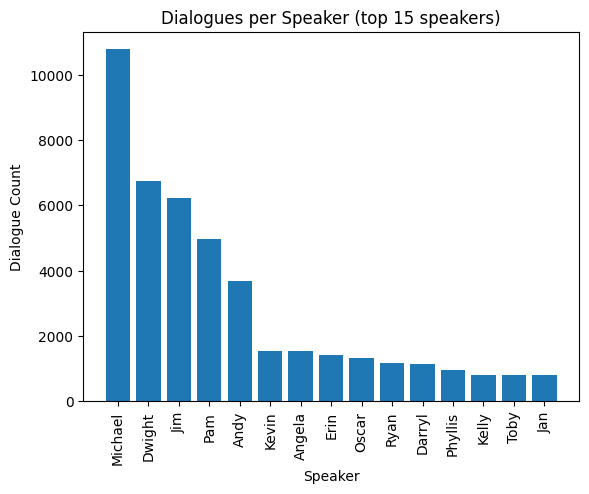

In [11]:
# Plot of number of Dialogues of top 15 speakers
import matplotlib.pyplot as plt

top_speakers = df.value_counts("speaker").head(15).keys()

speaker_counts = df[df["speaker"].isin(top_speakers)]["speaker"].value_counts()
speaker_names = speaker_counts.index
counts = speaker_counts.values

plt.bar(speaker_names, counts)
plt.xticks(rotation=90)
plt.xlabel("Speaker")
plt.ylabel("Dialogue Count")
plt.title("Dialogues per Speaker (top 15 speakers)")

plt.show()


In [12]:
df = df[df["speaker"].isin(top_speakers)]
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43981 entries, 0 to 43980
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    43981 non-null  object
 1   scene    43981 non-null  int64 
 2   speaker  43981 non-null  object
 3   line     43981 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


### Save new CSV to disk

In [13]:
with open("processed_data.csv", "w") as out_fd:
    df.to_csv(out_fd, index=False)

In [14]:
!ls -lh

total 9.5M
-rw-r--r-- 1 root root 4.6M Jan 18  2021 data.csv
-rw-r--r-- 1 root root 3.5M Apr 17 21:24 processed_data.csv
drwxr-xr-x 1 root root 4.0K Apr 14 13:35 sample_data
-rw-r--r-- 1 root root 1.4M Apr 17 21:23 the-office-us-complete-dialoguetranscript.zip


In [15]:
!head -10 processed_data.csv

title,scene,speaker,line
Pilot,1,Michael,All right Jim. Your quarterlies look very good. How are things at the library?
Pilot,1,Jim,"Oh, I told you. I couldn't close it. So..."
Pilot,1,Michael,"So you've come to the master for guidance? Is this what you're saying, grasshopper?"
Pilot,1,Jim,"Actually, you called me in here, but yeah."
Pilot,1,Michael,"All right. Well, let me show you how it's done."
Pilot,2,Michael," Yes, I'd like to speak to your office manager, please. Yes, hello. This is Michael Scott. I am the Regional Manager of Dunder Mifflin Paper Products. Just wanted to talk to you manager-a-manger.  All right. Done deal. Thank you very much, sir. You're a gentleman and a scholar. Oh, I'm sorry. OK. I'm sorry. My mistake.  That was a woman I was talking to, so... She had a very low voice. Probably a smoker, so...  So that's the way it's done."
Pilot,3,Michael,"I've, uh, I've been at Dunder Mifflin for 12 years, the last four as Regional Manager. If you want to come through here

# Convert .csv to a textual script for tokenization

### Meta tokens for the script text

In [16]:
# Defining the tokens
SCENE_START = "<scene_start>"
SCENE_END = "<scene_end>"

SPEAKER_START = "<speaker_start>"
SPEAKER_END = "<speaker_end>"

LINE_START = "<line_start>"
LINE_END = "<line_end>"

SENT_START = "<sent_start>"
SENT_END = "<sent_end>"

NEWLINE = "<NEWLINE>"

In [17]:
import csv
import nltk
import string
from nltk.tokenize import sent_tokenize

nltk.download('punkt')

# Used to remove punctuation from strings
translator = str.maketrans('', '', string.punctuation)

with open("script.txt", "w") as out_fd:
    out_fd.write(SCENE_START + " ")

    with open("processed_data.csv") as in_fd:
        csv_reader = csv.DictReader(in_fd)

        scene = 1
        for row in csv_reader:
            if int(row["scene"]) > scene:
                scene = int(row["scene"])
                out_fd.write(SCENE_END + " " + SCENE_START + " ")

            out_fd.write(f"{SPEAKER_START} {row['speaker']} {SPEAKER_END} {LINE_START} ")
            
            # A line may have multiple sentences
            sentences = sent_tokenize(row['line'])
            for sentence in sentences:
                sentence = sentence.translate(translator)
                out_fd.write(f"{SENT_START} {sentence} {SENT_END} ")

            out_fd.write(LINE_END + " ")

    out_fd.write(SCENE_END + " ")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [18]:
# Checking the first 500 characters of the file
!head -c500 script.txt

<scene_start> <speaker_start> Michael <speaker_end> <line_start> <sent_start> All right Jim <sent_end> <sent_start> Your quarterlies look very good <sent_end> <sent_start> How are things at the library <sent_end> <line_end> <speaker_start> Jim <speaker_end> <line_start> <sent_start> Oh I told you <sent_end> <sent_start> I couldnt close it <sent_end> <sent_start> So <sent_end> <line_end> <speaker_start> Michael <speaker_end> <line_start> <sent_start> So youve come to the master for guidance <sent

In [19]:
import csv
import nltk
import string
from nltk.tokenize import sent_tokenize

nltk.download('punkt')

# Used to remove punctuation from strings
translator = str.maketrans('', '', string.punctuation)

with open("script_simple.txt", "w") as out_fd:
    with open("processed_data.csv") as in_fd:
        csv_reader = csv.DictReader(in_fd)

        scene = 1
        for row in csv_reader:
            if int(row["scene"]) > scene:
                scene = int(row["scene"])

            out_fd.write(f"{row['speaker']}: {row['line']}\n")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
# Checking the first 500 characters of the file
!head -c500 script_simple.txt

Michael: All right Jim. Your quarterlies look very good. How are things at the library?
Jim: Oh, I told you. I couldn't close it. So...
Michael: So you've come to the master for guidance? Is this what you're saying, grasshopper?
Jim: Actually, you called me in here, but yeah.
Michael: All right. Well, let me show you how it's done.
Michael:  Yes, I'd like to speak to your office manager, please. Yes, hello. This is Michael Scott. I am the Regional Manager of Dunder Mifflin Paper Products. Just w

# Train word embedding model

In [21]:
# using the GloVe model
!wget https://nlp.stanford.edu/data/glove.6B.zip

--2023-04-17 21:24:05--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-04-17 21:24:06--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.09MB/s    in 2m 39s  

2023-04-17 21:26:46 (5.17 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [22]:
!unzip glove.6B.zip && ls

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       
data.csv	   processed_data.csv
glove.6B.100d.txt  sample_data
glove.6B.200d.txt  script_simple.txt
glove.6B.300d.txt  script.txt
glove.6B.50d.txt   the-office-us-complete-dialoguetranscript.zip
glove.6B.zip


In [23]:
import numpy as np

def load_glove_model(filepath):
    glove_model = {}
    with open(filepath,'r') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:], dtype=np.float64)
            glove_model[word] = embedding
    return glove_model

In [32]:
# Loading the GloVe model for the desired embedding size
EMBED_SIZE = 300
glove_model = load_glove_model(f"glove.6B.{EMBED_SIZE}d.txt")

In [33]:
# Load the training script
filename = "script_simple.txt"
raw_text = open(filename, "r").read()

### Separate punctuation from words

In [34]:
PUNCTUATIONS = set(['.', '[', ']', '(', ')', ';', ':', "'", '/', '"', ',', '?', '*', '!', '-', '$', '%', '&'])

for punct in PUNCTUATIONS:
    raw_text = raw_text.replace(punct, f" {punct} ")

# Keras' tokenizer gets rid of \n
raw_text = raw_text.replace("\n", f" {NEWLINE} ")

In [35]:
raw_text[:120]

'Michael :  All right Jim .  Your quarterlies look very good .  How are things at the library ?  <NEWLINE> Jim :  Oh ,  I'

In [36]:
# Convert all tokens to lower-case
tokens = raw_text.split()
tokens = [token.lower() for token in tokens]

In [37]:
tokens[:20]

['michael',
 ':',
 'all',
 'right',
 'jim',
 '.',
 'your',
 'quarterlies',
 'look',
 'very',
 'good',
 '.',
 'how',
 'are',
 'things',
 'at',
 'the',
 'library',
 '?',
 '<newline>']

In [38]:
glove_model["michael"]

array([ 3.6337e-01, -2.1047e-01,  6.4684e-01, -1.8417e-01,  2.0612e-01,
       -2.3688e-01, -3.4095e-01, -4.6431e-01, -3.1739e-01, -4.0770e-01,
        4.5746e-01,  2.1086e-01,  2.9473e-02,  1.3390e-01, -5.3772e-01,
       -1.0975e-01, -4.0693e-01, -4.6384e-01,  2.7349e-03,  6.6778e-01,
        5.5350e-01,  6.4761e-01,  2.6879e-02, -7.1526e-01,  2.6706e-01,
       -3.2590e-01,  1.7212e-01,  6.6302e-02, -6.4462e-01, -2.5713e-01,
       -5.2984e-02,  1.1503e-01,  2.1070e-01,  3.7471e-01, -1.8613e+00,
       -5.7297e-02,  4.2245e-01,  2.1364e-01,  3.1534e-01, -2.9126e-01,
       -3.9728e-01,  8.2748e-02,  1.3529e-01,  6.2794e-02,  5.7100e-02,
       -3.4083e-01, -2.8055e-01, -3.8088e-02, -2.4010e-02,  3.6893e-01,
        2.7360e-01, -6.2168e-01, -2.6288e-01,  2.0785e-01,  7.6890e-02,
        1.3224e-01, -9.4557e-02,  3.9737e-01, -5.0603e-01, -5.9722e-01,
        1.2466e-01,  4.4408e-01,  1.5798e-01,  4.2499e-02, -1.5451e-01,
       -7.1794e-01, -1.2439e-02, -6.5191e-01,  2.0474e-01, -4.51

### Tokenize and encode the text

In [39]:
from keras.models import Model, Sequential
from keras.layers import Embedding, Dense, LSTM, Dropout, Input
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer

In [40]:
# tokenizing and encoding the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([tokens])
encoded = tokenizer.texts_to_sequences([tokens])[0]

In [41]:
encoded[:10]

[9, 2, 53, 57, 19, 1, 50, 9469, 124, 127]

In [42]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

17389


### Generate input and output sequences

In [43]:
INPUT_SEQ_LEN = 100
STEP_SIZE = 5

X = []
Y = []

for idx in range(0, len(encoded) - INPUT_SEQ_LEN, STEP_SIZE):
    X.append(encoded[idx : idx + INPUT_SEQ_LEN])
    Y.append(encoded[idx + INPUT_SEQ_LEN])

X = np.array(X)
Y = np.array(Y)

### Build embeddings matrix

In [44]:
# defining the embedding matrix
embedding_matrix = np.zeros((vocab_size, EMBED_SIZE))
for word, idx in tokenizer.word_index.items():
    embedding_vector = glove_model.get(word, 0)
    embedding_matrix[idx] = embedding_vector

# LSTM Model

In [45]:
# This function is a data generator that yields batches of shuffled input and one-hot encoded output data of a specified size. 
# It is designed to efficiently process large datasets without loading the entire dataset into memory at once.
def data_generator(X, Y, batch_size, shuffle):
    while True:
        # Shuffle the data
        if shuffle:
            indices = np.random.permutation(len(X))
            X = X[indices]
            Y = Y[indices]

        # Generate batches
        for i in range(0, len(X), batch_size):
            X_batch = X[i:i+batch_size]
            Y_batch = Y[i:i+batch_size]

            # Convert labels to one-hot vectors
            Y_batch = to_categorical(Y_batch, vocab_size)

            # Yield the batch
            yield X_batch, Y_batch

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Define the model architecture
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=EMBED_SIZE, input_length=INPUT_SEQ_LEN, weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(512, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(256)))
model.add(Dense(vocab_size, activation='softmax'))

In [47]:
# Compile the model with Adam optimizer and categorical crossentropy loss
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy')

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          5216700   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 1024)        3330048   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 100, 1024)         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 512)              2623488   
 nal)                                                            
                                                                 
 dense (Dense)               (None, 17389)             8920557   
                                                                 
Total params: 20,090,793
Trainable params: 14,874,093
No

In [49]:
# Define the batch size and number of epochs
BATCH_SIZE = 128
EPOCHS =20
STEPS_PER_EPOCH = len(X) // BATCH_SIZE

In [52]:
# Define the callbacks for model checkpoint and learning rate reduction
checkpoint = ModelCheckpoint("weights.hdf5", monitor='loss', verbose=1, save_best_only=True, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=1, min_lr=0.0001)
callbacks = [checkpoint, reduce_lr]

In [53]:
# Train the model using the data generator
train_generator = data_generator(X, Y, BATCH_SIZE, shuffle=True)
model.fit(train_generator, steps_per_epoch=STEPS_PER_EPOCH, epochs=EPOCHS, callbacks=callbacks)

Epoch 1/20
1242/1242 [==============================] - ETA: 0s - loss: 4.0134
Epoch 1: loss improved from inf to 4.01339, saving model to weights.hdf5
1242/1242 [==============================] - 200s 161ms/step - loss: 4.0134 - lr: 0.0010
Epoch 2/20
1242/1242 [==============================] - ETA: 0s - loss: 3.7866
Epoch 2: loss improved from 4.01339 to 3.78663, saving model to weights.hdf5
1242/1242 [==============================] - 200s 161ms/step - loss: 3.7866 - lr: 0.0010
Epoch 3/20
1242/1242 [==============================] - ETA: 0s - loss: 3.6295
Epoch 3: loss improved from 3.78663 to 3.62946, saving model to weights.hdf5
1242/1242 [==============================] - 199s 161ms/step - loss: 3.6295 - lr: 0.0010
Epoch 4/20
1242/1242 [==============================] - ETA: 0s - loss: 3.4903
Epoch 4: loss improved from 3.62946 to 3.49031, saving model to weights.hdf5
1242/1242 [==============================] - 199s 160ms/step - loss: 3.4903 - lr: 0.0010
Epoch 5/20
1242/1242 [==

In [54]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# function to generate the top p samplings based on seed speaker
def generate_top_p_sampling(seed_speaker, n_lines, temperature=1.0, max_words=500, top_p=0.9):
    assert seed_speaker in set(top_speakers), "Seed speaker is not a top speaker"

    seed_text = generated_text = f"{seed_speaker.lower()} : "

    lines_generated = 0
    words_generated = 0

    while True:
        if lines_generated == n_lines or words_generated == max_words:
            break

        # Tokenize and encode the seed text
        encoded = tokenizer.texts_to_sequences([seed_text.split(" ")])
        padded_seq = pad_sequences(encoded, maxlen=model.input_shape[1], truncating='pre')

        # Generate the predicted word
        predicted = model.predict(padded_seq, verbose=0)[0]
        predicted = np.log(predicted) / temperature
        predicted = np.exp(predicted) / np.sum(np.exp(predicted))
        sorted_preds = np.argsort(predicted)[::-1]  # sort in descending order
        cumulative_probs = np.cumsum(predicted[sorted_preds])
        sorted_preds_to_remove = cumulative_probs > top_p
        sorted_preds_to_remove[1:] = sorted_preds_to_remove[:-1]
        sorted_preds_to_remove[0] = False
        predicted[sorted_preds[sorted_preds_to_remove]] = 0
        predicted = predicted / np.sum(predicted)
        predicted_idx = np.random.choice(len(predicted), p=predicted)
        predicted_word = tokenizer.index_word[predicted_idx]

        words_generated += 1

        if predicted_word == NEWLINE.lower():
            lines_generated += 1

        # Append the predicted word to the generated text
        generated_text += " " + predicted_word

        # Update the seed text for the next iteration
        seed_text += " " + predicted_word

    return generated_text

In [55]:
# The output from the model is space seperated including punctuation. 
# Thus after generating the script, this function removes punctuations before and after certain punctuation marks.
def post_process(text):
    punctuation_to_attach_to_previous_word = ['.', ':', '!', ';', ')', ']', '?', ',', '%']
    for punctuation in punctuation_to_attach_to_previous_word:
        text = text.replace(' ' + punctuation, punctuation)
        
    punctuation_to_attach_to_following_word = ['[', '(', '$']
    for punctuation in punctuation_to_attach_to_following_word:
        text = text.replace(punctuation + ' ', punctuation)
        
    punctuation_to_attach_to_same_word = ["'", '-']
    for punctuation in punctuation_to_attach_to_same_word:
        text = text.replace(' ' + punctuation + ' ', punctuation)
        
    text = text.replace(NEWLINE.lower(), "\n")
    text = text.replace("\n ", "\n")
    
    return text

In [56]:
# Generating the script
script = generate_top_p_sampling(
    seed_speaker="Dwight",
    n_lines=15,
    temperature=0.9,
    top_p=0.9
)

print(post_process(script))

<ipython-input-54-a1a3815a71d7>:21: RuntimeWarning: divide by zero encountered in log
  predicted = np.log(predicted) / temperature


dwight:  kids my deliciousity, uh, you did dwight, um, toby, um, jan, um, i don't know, i did, but, thanks bye bye. 
michael: what? 
jim: no, actually, toby, did people, um, much, enjoy your baby can come and be baby 
dwight: hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, how do you mean? 
jim: you know, hooters? did you look... i just... 
jim: so, thanks. i'm pretty cool. 
michael: okay, let's do anything. i'm equipped-- i mean, we're just worried... i'm sorry i'm doing it. 
pam: oh, god. 
michael: hey! 
pam: michael, listen to me, it was just, incredibly late for tonight. but, i think she'd be great, but it's coming to you, i promise it. i am so proud of that. 
pam: yeah, but you know what? honestly, i blew the gifts. and i'm a regional manager. i think it's really bad. 
michael: oh, yeah. 
pam: uh, you're the dad to make sure whatever you, " the company will still be a show of strengths, right? 
pam: hey! 
michael: okay. 



In [57]:
script

'dwight :  kids my deliciousity , uh , you did dwight , um , toby , um , jan , um , i don \' t know , i did , but , thanks bye bye . <newline> michael : what ? <newline> jim : no , actually , toby , did people , um , much , enjoy your baby can come and be baby <newline> dwight : hey , hey , hey , hey , hey , hey , hey , hey , hey , hey , hey , hey , hey , hey , hey , how do you mean ? <newline> jim : you know , hooters ? did you look . . . i just . . . <newline> jim : so , thanks . i \' m pretty cool . <newline> michael : okay , let \' s do anything . i \' m equipped - - i mean , we \' re just worried . . . i \' m sorry i \' m doing it . <newline> pam : oh , god . <newline> michael : hey ! <newline> pam : michael , listen to me , it was just , incredibly late for tonight . but , i think she \' d be great , but it \' s coming to you , i promise it . i am so proud of that . <newline> pam : yeah , but you know what ? honestly , i blew the gifts . and i \' m a regional manager . i think it

In [58]:
# Saving the model
model.save('the_office_model')

In [59]:
!zip the_office_model.zip the_office_model/*

  adding: the_office_model/assets/ (stored 0%)
  adding: the_office_model/fingerprint.pb (stored 0%)
  adding: the_office_model/keras_metadata.pb (deflated 92%)
  adding: the_office_model/saved_model.pb (deflated 91%)
  adding: the_office_model/variables/ (stored 0%)


### Heatmap plot to visualize dialogue between top 15 characters based on the next character they interacter with

In [63]:
# Creating a new DataFrame to consider just the speaker and the dialogue to plot the heatmap
new_df = data.drop(['title', 'scene'], axis=1)

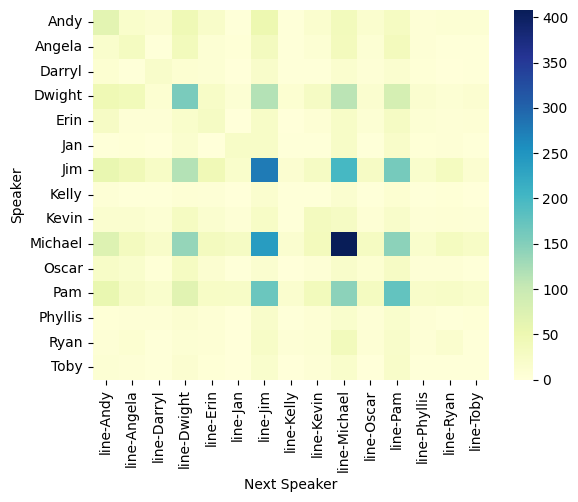

In [65]:
# Create a new column for next speaker
new_df['next_speaker'] = new_df.groupby(['line'])['speaker'].shift(-1)

new_df = new_df[new_df['next_speaker'].isin(top_speakers_15)]

# Create a pivot table
table = new_df.pivot_table(index='speaker', columns='next_speaker', aggfunc=len, fill_value=0)

# Create heatmap
sns.heatmap(table, cmap='YlGnBu')
plt.xlabel('Next Speaker')
plt.ylabel('Speaker')
# Show plot
plt.show()


# Neural Net Classifier

- To evaluate the quality of the generated script using neural network classifier.

In [66]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.utils import compute_class_weight
import numpy as np

# Step 1: Prepare the data
data = pd.read_csv('processed_data.csv')
speaker = data['speaker'].values
dialogue = data['line'].values

# a list of unique speakers
unique_speakers = list(set(speaker))
print(unique_speakers)

# Split the data into training, validation, and testing sets
train_dialogue, test_dialogue, train_speaker, test_speaker = train_test_split(dialogue, speaker, test_size=0.2, random_state=42)
train_dialogue, val_dialogue, train_speaker, val_speaker = train_test_split(train_dialogue, train_speaker, test_size=0.2, random_state=42)

# Step 2: Convert the data to numerical form
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_dialogue)

# max length and vocabulary size
max_length = max([len(d.split()) for d in train_dialogue])
vocab_size = len(tokenizer.word_index) + 1

# train, validation and test sequences
train_seq = tokenizer.texts_to_sequences(train_dialogue)
train_seq = pad_sequences(train_seq, maxlen=max_length, padding='post')

val_seq = tokenizer.texts_to_sequences(val_dialogue)
val_seq = pad_sequences(val_seq, maxlen=max_length, padding='post')

test_seq = tokenizer.texts_to_sequences(test_dialogue)
test_seq = pad_sequences(test_seq, maxlen=max_length, padding='post')

# train, validation and test lables
train_labels = tf.one_hot([unique_speakers.index(s) for s in train_speaker], depth=len(unique_speakers))
val_labels = tf.one_hot([unique_speakers.index(s) for s in val_speaker], depth=len(unique_speakers))
test_labels = tf.one_hot([unique_speakers.index(s) for s in test_speaker], depth=len(unique_speakers))

# defining the embedding matrix
embedding_matrix_ = np.zeros((vocab_size, EMBED_SIZE))
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_matrix[i-1] # subtract 1 to account for the zero index
    if embedding_vector is not None:
        embedding_matrix_[i] = embedding_vector

train_labels_list = train_labels.numpy().argmax(axis=1).tolist()


# Calculate class weights
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(train_labels_list), y=train_labels_list)

# Convert class indices to Python integers
class_indices = [int(c) for c in np.unique(train_labels_list)]

# Create class weight dictionary
class_weight_dict = {class_indices[i]: class_weights[i] for i in range(len(class_indices))}

                                              
# Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 300, weights=[embedding_matrix_], input_length=max_length, trainable=True),
    tf.keras.layers.LSTM(512),
    tf.keras.layers.Dense(len(unique_speakers), activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 4: Train and evaluate the model
history = model.fit(train_seq, train_labels, epochs=25,  class_weight=class_weight_dict, validation_data=(val_seq, val_labels))

test_loss, test_acc = model.evaluate(test_seq, test_labels)
print('Test accuracy:', test_acc)

['Phyllis', 'Darryl', 'Kevin', 'Jim', 'Pam', 'Toby', 'Jan', 'Oscar', 'Angela', 'Kelly', 'Andy', 'Ryan', 'Erin', 'Michael', 'Dwight']
Epoch 1/25
880/880 [==============================] - 68s 75ms/step - loss: 2.7106 - accuracy: 0.0527 - val_loss: 2.7207 - val_accuracy: 0.0217
Epoch 2/25
880/880 [==============================] - 41s 46ms/step - loss: 2.7096 - accuracy: 0.0562 - val_loss: 2.7004 - val_accuracy: 0.0280
Epoch 3/25
880/880 [==============================] - 39s 44ms/step - loss: 2.7096 - accuracy: 0.0466 - val_loss: 2.7113 - val_accuracy: 0.0217
Epoch 4/25
880/880 [==============================] - 39s 44ms/step - loss: 2.7270 - accuracy: 0.0544 - val_loss: 2.8530 - val_accuracy: 0.1363
Epoch 5/25
880/880 [==============================] - 37s 42ms/step - loss: 2.7744 - accuracy: 0.0515 - val_loss: 2.8226 - val_accuracy: 0.0249
Epoch 6/25
880/880 [==============================] - 36s 41ms/step - loss: 2.6809 - accuracy: 0.0832 - val_loss: 2.7567 - val_accuracy: 0.0409
Epo

In [67]:
# Testing the Neural Net classifier on Michael's most famous/frequently used dialogue from the show
dialogue = "That's what she said"
new_seq = tokenizer.texts_to_sequences([dialogue])
new_seq = pad_sequences(new_seq, maxlen=max_length, padding='post')

# Get the predicted speaker (expected output -> 'Michael')
predicted_probs = model.predict(new_seq)[0]
predicted_speaker_index = np.argmax(predicted_probs)
predicted_speaker = unique_speakers[predicted_speaker_index]
print(predicted_speaker)

1/1 [==============================] - 0s 483ms/step
Michael


# Pass the generated text through Neural Net Classifier

In [69]:
# Testing the output generated by the Bidirectional LSTM by passing each dialogue generated by LSTM and compareing the expected vs predicted speaker.
from collections import defaultdict

LSTM_output = post_process(script)
lines = LSTM_output.split("\n")

output_dict = defaultdict(list)

for line in lines:
    if ":" in line:
        key, value = line.split(":", 1)
        output_dict[key.strip()].append(value.strip())


predicted_speakers = []
for speaker, dialogues in output_dict.items():
    for dialogue in dialogues:
        # Preprocess the dialogue
        new_seq = tokenizer.texts_to_sequences([dialogue])
        new_seq = pad_sequences(new_seq, maxlen=max_length, padding='post')

        # Get the predicted speaker
        predicted_probs = model.predict(new_seq)[0]
        predicted_speaker_index = np.argmax(predicted_probs)
        predicted_speaker = unique_speakers[predicted_speaker_index]
        # predicted_speakers.append(predicted_speaker)
        print(f"The predicted speaker for the dialogue '{dialogue}' by {speaker} is {predicted_speaker}")

1/1 [==============================] - 0s 20ms/step
The predicted speaker for the dialogue 'kids my deliciousity, uh, you did dwight, um, toby, um, jan, um, i don't know, i did, but, thanks bye bye.' by dwight is Jim
1/1 [==============================] - 0s 25ms/step
The predicted speaker for the dialogue 'hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, hey, how do you mean?' by dwight is Dwight
1/1 [==============================] - 0s 22ms/step
The predicted speaker for the dialogue 'what?' by michael is Oscar
1/1 [==============================] - 0s 21ms/step
The predicted speaker for the dialogue 'okay, let's do anything. i'm equipped-- i mean, we're just worried... i'm sorry i'm doing it.' by michael is Jim
1/1 [==============================] - 0s 20ms/step
The predicted speaker for the dialogue 'hey!' by michael is Erin
1/1 [==============================] - 0s 20ms/step
The predicted speaker for the dialogue 'oh, yeah.' by michael is Erin
1/1 [==========